# Exercise 5.28

In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import pandas as pd
from scipy import stats
from chapter_5_utils import plot_future_control_ellipse

In [2]:
def load_data() -> pd.DataFrame:
    # Automobile nominal thickness data.
    fpth = pathlib.Path(r'..\..\data\Table5.14.xlsx')
    return pd.read_excel(fpth)

In [3]:
# Keep only the first 30 observations.
thick_df = load_data()
thick_df.head(3)

,x1,x2,x3,x4,x5,x6
0,-0.12,0.36,0.40,0.25,1.37,-0.13
1,-0.60,-0.35,0.04,-0.28,-0.25,-0.15
2,-0.13,0.05,0.84,0.61,1.45,0.25


## (a)

In [4]:
X = thick_df.to_numpy()
X_del = thick_df.iloc[0:30, :].to_numpy()
n, p = X.shape

In [5]:
xbar = np.mean(X_del, axis=0).reshape(p, 1)
S = np.cov(X_del, rowvar=False)

In [6]:
alpha = 0.05
f_crit = (((n-1)*p)/(n-p))* stats.f(dfn=p, dfd=n-p).ppf(q=1-alpha)

Compute $T^{2} = {\left(\textbf{x} - \bar{\textbf{x}}\right)}^{\prime} \textbf{S}^{-1} {\left(\textbf{x} - \bar{\textbf{x}}\right)}$

In [7]:
Sinv = la.inv(S)
comp_T2 = lambda x: (x.reshape(1,p) - xbar.T) @ Sinv @ (x.reshape(p,1) - xbar)
T2 = np.array([comp_T2(X[i,:]).flatten() for i in range(X.shape[0])])

In [8]:
ucl_crit95 = stats.chi2.ppf(1-0.05, p)
ucl_crit99 = stats.chi2.ppf(1-0.01, p)
print(f'95% UCL = {ucl_crit95}')
print(f'99% UCL = {ucl_crit99}')

95% UCL = 12.591587243743977
99% UCL = 16.811893829770927


In [9]:
# Get the index values for the T^2 values that exceed the 95% UCL.
exceed_idx = np.where(ucl_crit95 < T2)[0]

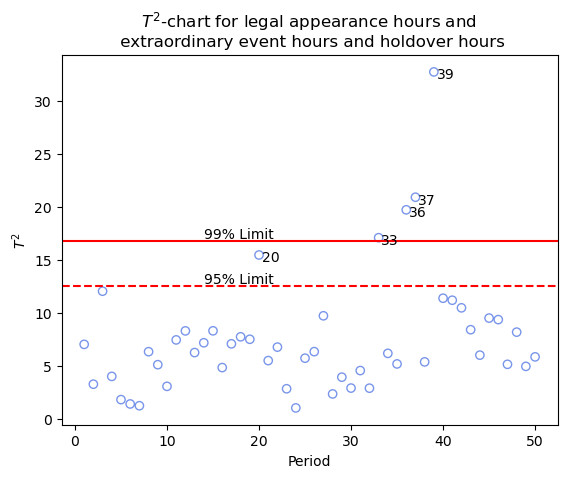

In [10]:
plt.axhline(y=ucl_crit95, color='r', linestyle='--')
plt.axhline(y=ucl_crit99, color='r', linestyle='-')
plt.annotate('95% Limit', xy=(15, ucl_crit95), xytext=(14, ucl_crit95+.2))
plt.annotate('99% Limit', xy=(15, ucl_crit99), xytext=(14, ucl_crit99+.2))

plt.scatter(np.arange(n)+1, T2,
            alpha=0.70,
            facecolors='none',
            edgecolors='royalblue')

for i, pt_label in enumerate(exceed_idx):
    plt.annotate(pt_label+1,
                 (pt_label+1.5, T2[pt_label]),
                 textcoords="offset points",
                 xytext=(5,-5),
                 ha='center')

plt.title(f'$T^{2}$-chart for legal appearance hours and \n extraordinary event hours and holdover hours')
plt.xlabel('Period')
plt.ylabel('$T^{2}$')
plt.savefig('Question-5-28-a-T2.png')
plt.show()

## (b)

In [11]:
# The T^2 values that exceed the 95% UCL.
np.take(T2, exceed_idx)

array([15.50168704, 17.12867866, 19.75910726, 20.94689455, 32.75783248])

In [12]:
# The associated observations that exceed the 95% UCL. Note that the printed df index are zero indexed, but the index column in Table 5.14 is one indexed, so add one to the index values here to match Table 5.14. 
thick_df.iloc[exceed_idx, :]

,x1,x2,x3,x4,x5,x6
19,-0.46,0.36,0.24,-0.58,0.15,0.25
32,-0.47,-0.16,-0.34,-0.31,0.85,0.60
35,-0.90,-0.40,0.75,-0.31,0.60,-0.10
36,-0.50,-0.35,0.84,-0.52,0.35,-0.75
38,-0.60,-0.35,-0.35,-0.34,0.60,0.85
